# Principal Component Analysis with [Python](https://www.python.org/) &nbsp;<a href="https://www.python.org/"><img src="https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png" style="max-width: 35px; display: inline" alt="Python"/></a>

_Visualization and denoising of handwritten digits_

--- 


In this tutorial, we illustrate some of the uses of Principal Component Analysis (PCA) in data analysis. Indeed, while PCA is fundamentally a dimensionality reduction algorithm, it can also be useful as a tool for visualization, noise filtering, feature extraction and much more. 

Here, we will take a look at the [digit dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py) included with [`Scikit-Learn`](https://scikit-learn.org)

---

_Based on [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)._

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

## Handwritten Digits

The digits dataset is made of $n$ small images in black and white. Each image represents a handwritten number.

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

##### <span style="color:purple"> **Question:** How many images does this dataset contain? Which size are the images?</span>

In [20]:
### TO BE COMPLETED ###
print(digits.data.shape)
print(digits.images.shape)


(1797, 64)
(1797, 8, 8)


> Comments?
On a 1797 images et elles sont de taille 8*8 : data c'est les données en ligne (taille 64) et image c'est pareil mais en matrice 8*8

##### <span style="color:purple"> **Todo:** visualize the first few data points.</span>

- Choose a suitable colormap,
- You can use the [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function.

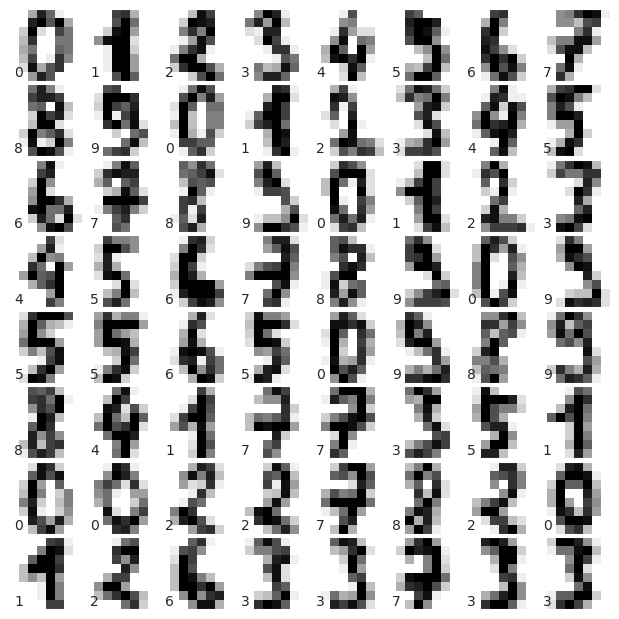

In [34]:
### TO BE COMPLETED ###
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap =plt.cm.binary, interpolation ='nearest') 
    
# label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

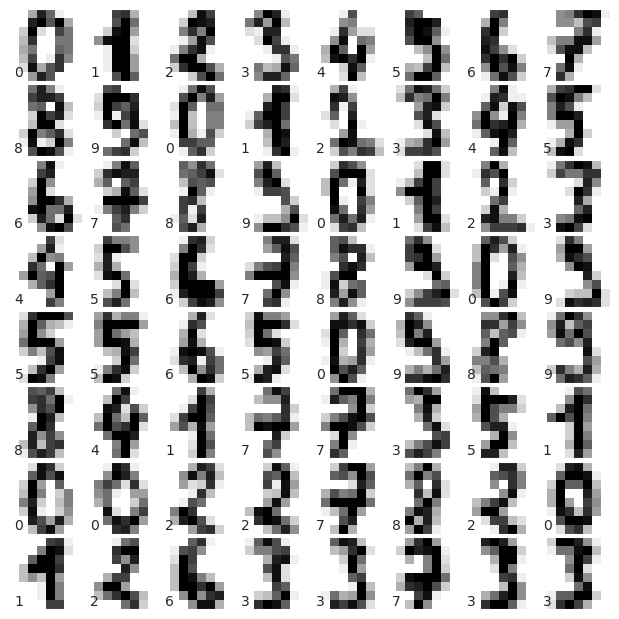

In [35]:
# %load solutions/plot_digits.py
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## PCA as Dimensionality Reduction

So we are looking at points of dimension 64, which can be complicated to visualize. To gain some intuition into the relationships between these points, we can use PCA to project them into a more manageable number of dimensions, say two (or three).

In [36]:
from sklearn.decomposition import PCA

##### <span style="color:purple"> **Todo:** Perform PCA on the digit data.</span>

- Project from 64 to 2 dimensions.
- What is the variance explained by each of the component?

In [94]:
### TO BE COMPLETED ###

pca = PCA(n_components=2)
new=pca.fit_transform(digits.data)

print('--- nouvelle dimension ---')
print(new.shape)


print(pca.explained_variance_ratio_)

--- nouvelle dimension ---
(1797, 2)
[0.14890594 0.13618771]


In [45]:
# %load solutions/pca_digits.py
pca = PCA(2)  # projection from 64 to 2 dimensions

projected = pca.fit_transform(digits.data)

print('--- PCA ---')
print('Initial dimension:', digits.data.shape)
print('Dimension after projection:', projected.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')

# print(pca.components_[:2])

--- PCA ---
Initial dimension: (1797, 64)
Dimension after projection: (1797, 2)

--- Explained variance ---
Component 1: 179.01 i.e. 14.89 % of the total variance
Component 2: 163.72 i.e. 13.62 % of the total variance


##### <span style="color:purple"> **Todo:** Plot the first two principal components of each point, colored according to its value.</span>

/tmp/ipykernel_5424/133534765.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10_r', 10)) # nuage de points


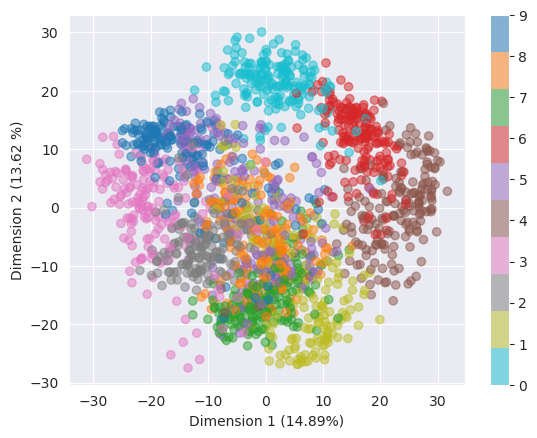

In [69]:
### TO BE COMPLETED ###



plt.scatter(projected[:,0],projected[:,1], c = digits.target, alpha = 0.5,
            cmap = plt.cm.get_cmap('tab10_r', 10)) # nuage de points
plt.xlabel("Dimension 1 (14.89%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (13.62 %)") # idem pour axe Y
plt.colorbar()
plt.show()



/tmp/ipykernel_5424/2230732290.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10_r', 10))


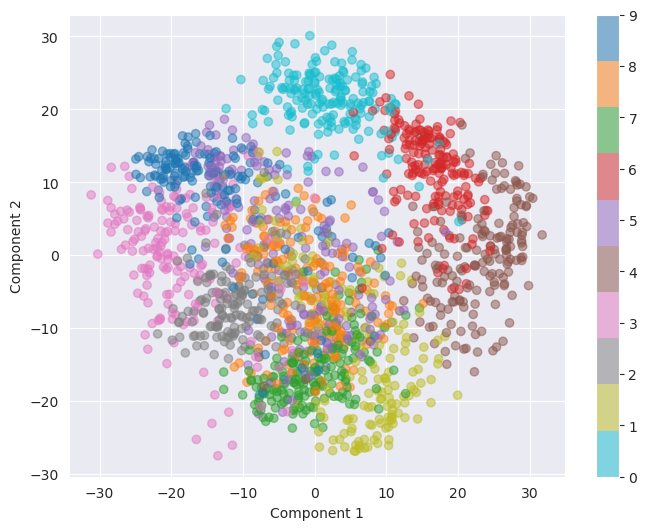

In [68]:
# %load solutions/scatter_digits.py
plt.figure(figsize = (8, 6))
plt.scatter(projected[:, 0], projected[:, 1],
            c = digits.target, alpha = 0.5,
            cmap = plt.cm.get_cmap('tab10_r', 10))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

#chaque couleur correspond à un nombre et chaque nb est une CL de la composante 1 et 2 
#on ne distingue pas de cluster toutes les couleurs sont mélangées donc on ne peut pas bien représenté notre image car tous les nombres se superposent

_Note:_ Here, the points are colored according to their numerical value. However, the PCA decomposition obtained was performed in an unsupervised manner, i.e. without using the associated labels.

##### <span style="color:purple"> **Question:** How well can images be reconstructed when projected into a $d$-dimensional space?</span>

- Visually compare the initial digits with those obtained after: (i) projection onto the PCA space (`fit_transform`) followed by (ii) inverse transformation (`inverse_transform`). 
- Evaluate the effect of the dimension $d$ of the PCA space.
- Measure the mean squared error ([MSE](https://en.wikipedia.org/wiki/Mean_squared_error)) between initial and reconstructed data. 

MSE: 0.7681544817690237

> Initial images


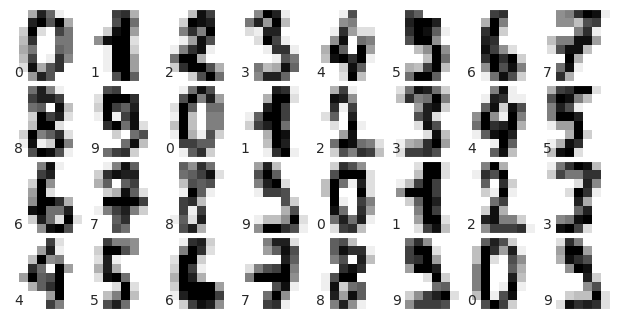


> Reconstructed images 


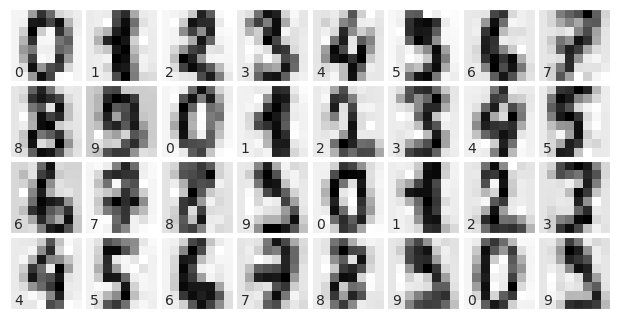

In [87]:
### TO BE COMPLETED ###

d = 30
pca = PCA(d)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
reconstructed = pca.inverse_transform(projected)

print('MSE:', np.mean((digits.data - reconstructed)** 2))
print('')

# --- #
# Initial images

print('> Initial images')

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=.5, hspace=0.05, wspace=0.05)

for i in range(32):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()
print('')


# --- #
# Reconstructed Images 

print('> Reconstructed images ')
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=.5, hspace=0.05, wspace=0.05)

for i in range(32):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(reconstructed[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

MSE: 1.9843198146700005

> Initial images


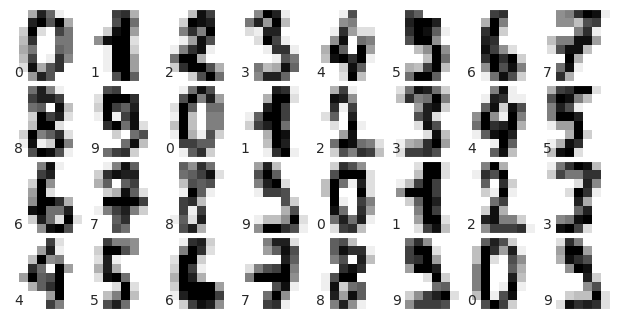


> Reconstructed images 


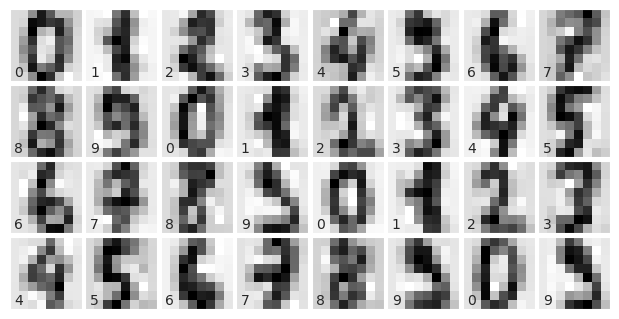

In [80]:
# %load solutions/reconstructed_digits.py
d = 20
pca = PCA(d)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
reconstructed = pca.inverse_transform(projected)

print('MSE:', np.mean((digits.data - reconstructed)** 2))
print('')

# --- #
# Initial images

print('> Initial images')
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=.5, hspace=0.05, wspace=0.05)

for i in range(32):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()
print('')

# --- #
# Reconstructed Images 

print('> Reconstructed images ')
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=.5, hspace=0.05, wspace=0.05)

for i in range(32):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(reconstructed[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

> Comments?

##### <span style="color:purple"> **Todo:** Plot the evolution of the MSE as a function of $d$.</span>

In [ ]:
### TO BE COMPLETED ###

[...]

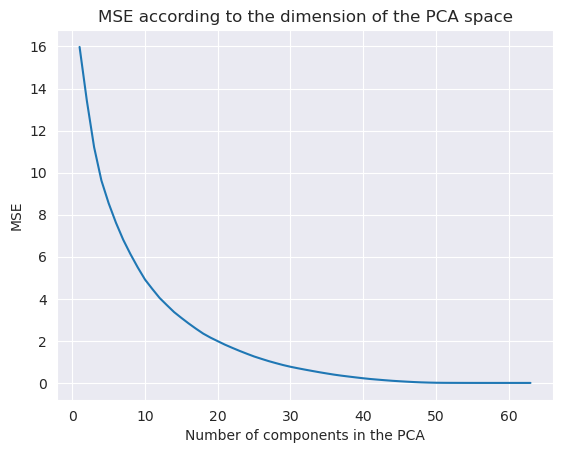

In [89]:
# %load solutions/MSE_digits.py
n = digits.data.shape[1]
MSE = np.zeros(n-1)

for d in range(n-1):
    pca = PCA(d+1)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(digits.data)
    reconstructed = pca.inverse_transform(projected)
    MSE[d] = np.mean((digits.data - reconstructed)** 2)

# --- #

plt.plot(np.arange(1,n), MSE)

plt.title('MSE according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('MSE')
plt.show()

In particular, we note that above a certain number of components, MSE no longer decreases. 

##### <span style="color:purple"> **Todo:** Using a suitable tool, determine the "right" number of components to keep.</span>

An essential element in the practical use of PCA is the ability to estimate the number of components needed to describe the data. This can be determined by examining <span style="color:purple">**...**</span>

In [91]:
## TO BE COMPLETED ##



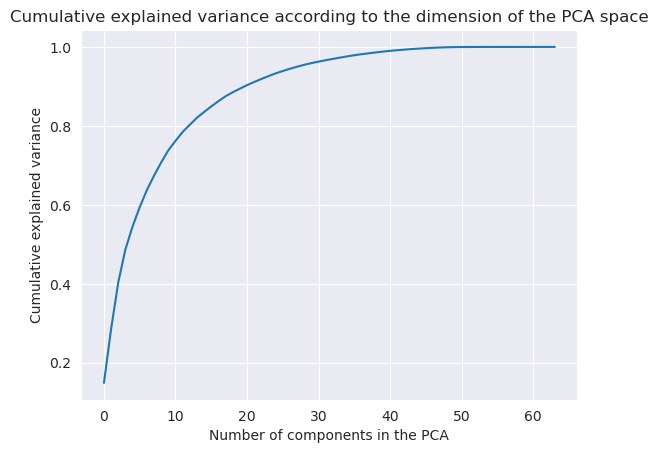

In [92]:
# %load solutions/nb_components.py
pca = PCA().fit(digits.data)

# --- #

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');

> An essential element in the practical use of PCA is the ability to estimate the number of components needed to describe the data. This can be determined by examining the cumulative _ratio of explained variance_ as a function of the number of components.

> For example, the first 10 components contain around 75% of the variance, whereas it takes around 50 components to describe almost 100% of the variance. In particular, our previous two-dimensional projection loses a lot of information, and we would need around 20 components to retain 90% of the variance.  


This curve quantifies how much of the total 64-dimensional variance is contained in the first $d$ components.
Examining this graph for a high-dimensional dataset can help you understand the level of redundancy present in its features.

### Components in a picture?

In the context of images, performing a PCA consists in determining the most appropriate groupings of pixels which, once added together (with an appropriate weighting), enable the reconstruction of the original image.

The `plot_pca` function below, taken from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Digits-PCA-Components) allows to visualize this decomposition.

In [96]:
from plot_pca import plot_pca_components

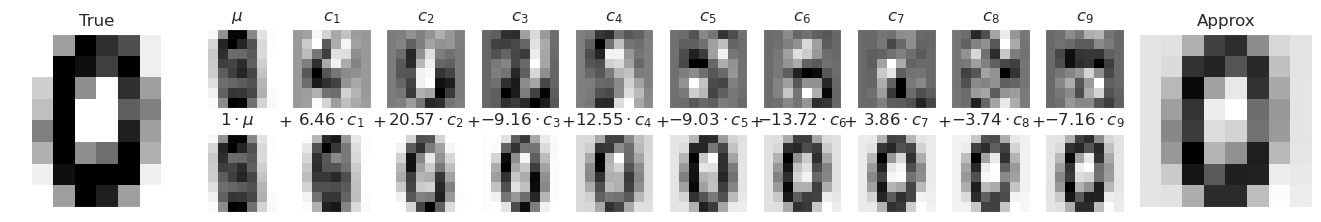

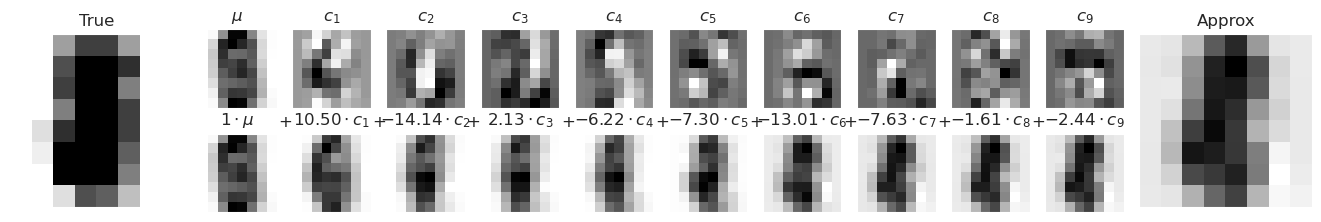

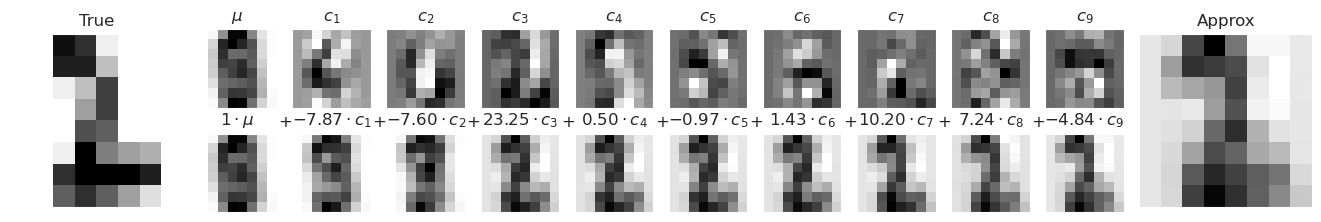

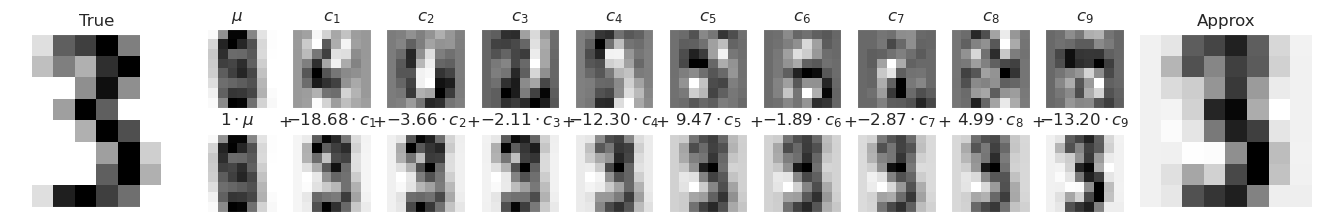

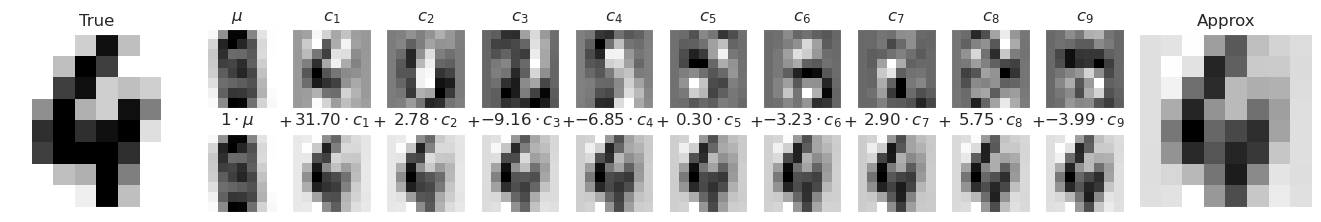

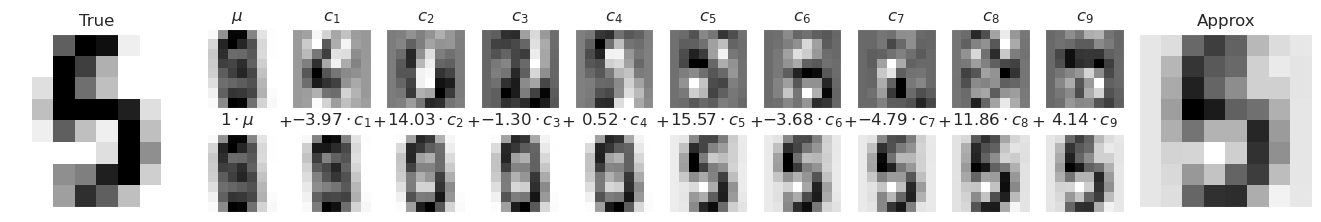

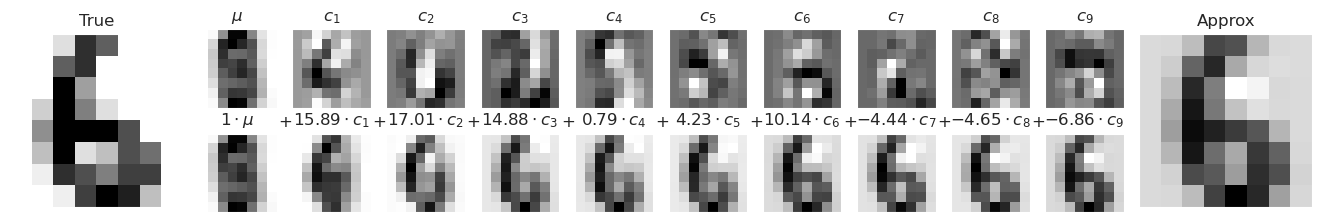

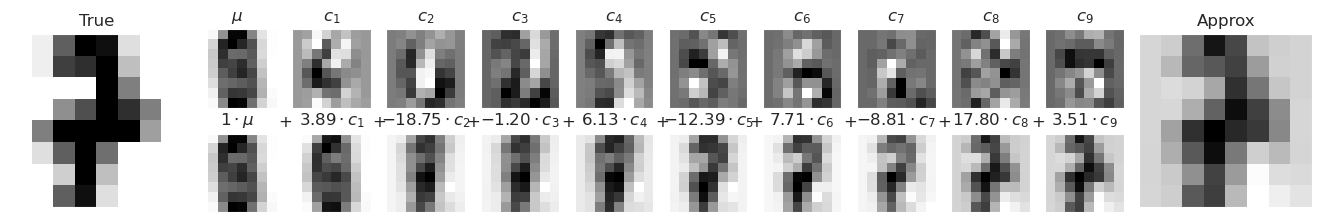

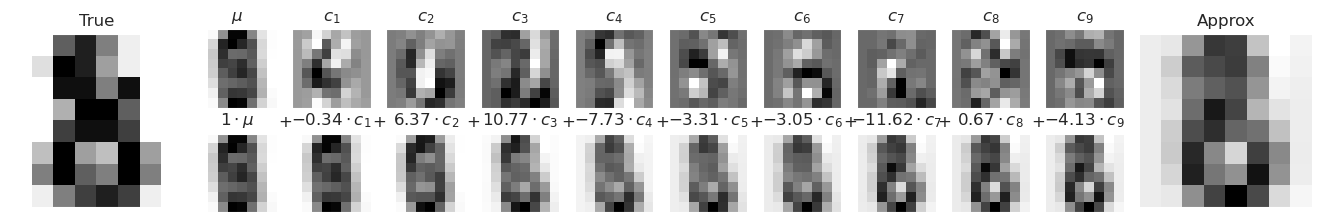

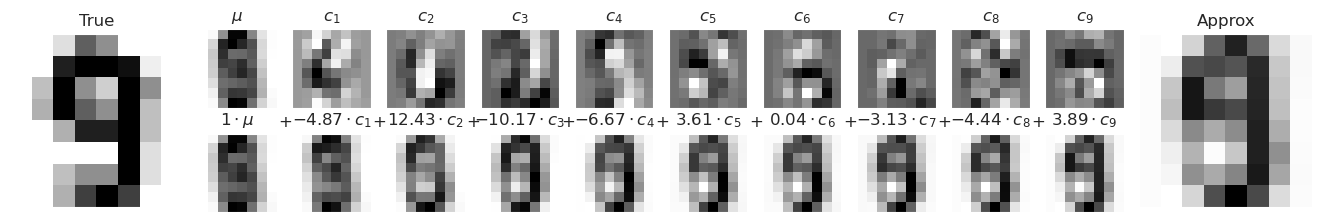

In [97]:
d = 9
pca = PCA(n_components=d)
projected = pca.fit_transform(digits.data)

# --- #

for i in range(10):
    id = np.where(digits.target == i)[0][-1]
    fig = plot_pca_components(digits.data[id], projected[id], pca.mean_, pca.components_, n_components=9)
    plt.show()

[ 2.22044605e-16 -1.01060413e-02 -4.90830726e-02 -9.43497858e-03
 -5.36029157e-02 -1.17758212e-01 -6.21281545e-02 -7.93556672e-03
 -1.63222909e-04 -2.10162821e-02  6.03490610e-02 -5.33739366e-03
 -9.19716483e-02 -5.19195086e-02 -5.89354092e-02 -3.33274850e-03
 -4.22859059e-05  3.62452793e-02  1.98260091e-01 -4.86352948e-02
 -2.25576455e-01 -4.50501002e-03  2.67708744e-02 -2.08738325e-04
 -5.66231227e-05  7.71213250e-02  1.88447753e-01 -1.37952844e-01
 -2.61049987e-01  4.98348166e-02  6.51116273e-02  4.03180839e-05
  0.00000000e+00  8.81535101e-02  8.71676276e-02 -2.70859101e-01
 -2.85289954e-01  1.66462851e-01  1.27859678e-01  0.00000000e+00
  2.89449452e-04  5.08296461e-02  1.30272454e-01 -2.68900712e-01
 -3.01575607e-01  2.40263383e-01  2.17556174e-01  1.32720722e-03
  2.86749765e-04  1.05551318e-02  1.53370967e-01 -1.19536611e-01
 -9.72565659e-02  2.85869544e-01  1.48776417e-01  5.41770940e-04
 -3.33991771e-05 -1.00786354e-02 -7.02700475e-02  1.71076341e-02
  1.94293229e-01  1.76696

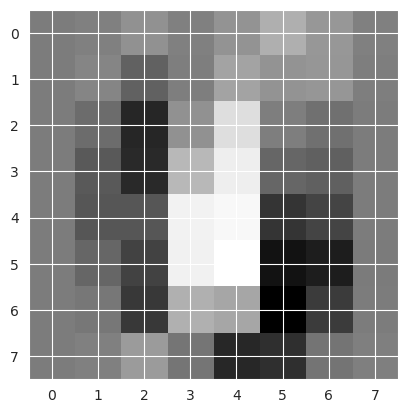

In [106]:
plt.imshow(pca.components_[1].reshape(8,8), interpolation='nearest', cmap=plt.cm.binary)

print(pca.components_[1])

 random samples from a normal (Gaussian) distribution. The probability density function of the ## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.

The **idea** is that all components whose variance is much greater than the effect of noise should be relatively unaffected by noise.
So, if you reconstruct the data using only the largest subset of principal components, you should preferentially retain the signal and reject the noise.

Let's see what happens with the digits data.

The function below makes it easy to check the first 4 digits of each category.

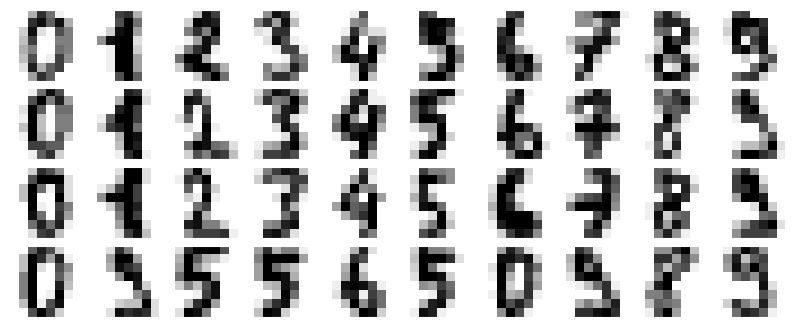

In [98]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap = 'binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)

##### <span style="color:purple"> **Todo:** Add some random noise to create a noisy dataset, and replot it.</span>

In [ ]:
### TO BE COMPLETED ###

rng = np.random.default_rng(12)

[...]

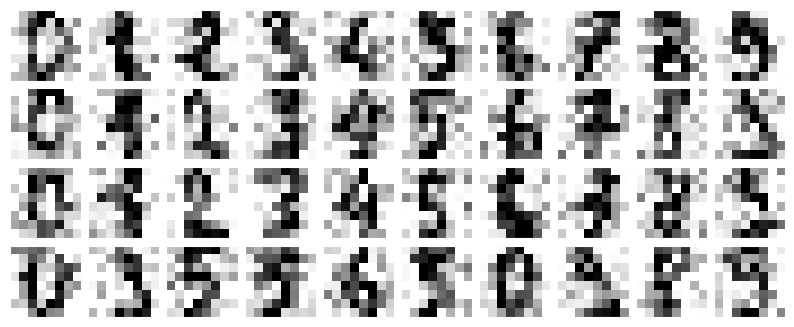

In [109]:
# %load solutions/data_noisy.py
rng = np.random.default_rng(12)

noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

> The visualization makes the presence of this random noise clear.

##### <span style="color:purple"> **Question:** How many components should be kept in the PCA decomposition to ensure that the projection retains at least 50% of the total variance?</span>

In [ ]:
### TO BE COMPLETED ###

[...]

In [117]:
# %load solutions/pca_noisy.py
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

> Here 50% of the variance amounts to 12 principal components, out of the 64 original features.

##### <span style="color:purple"> **Todo:** Reconstruct the filtered digits.</span>

- Project on the ACP space,
- Use the inverse transformation to determine the denoised digits,
- Compare with the noiseless digits.

In [ ]:
### TO BE COMPLETED ###

[...]

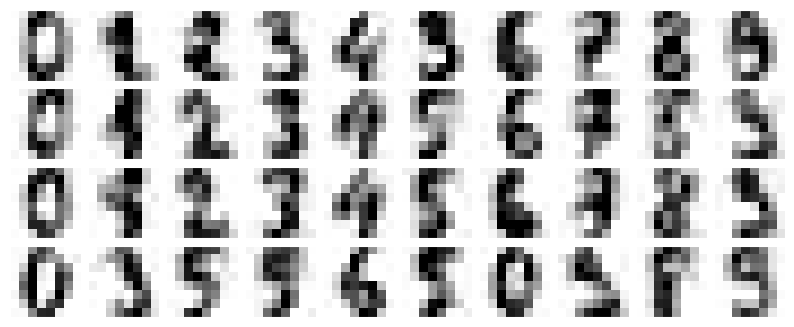

In [118]:
# %load solutions/filtered_noisy.py
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)

plot_digits(filtered)

<!-- This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional principal component representation, which will automatically serve to filter out random noise in the inputs. -->